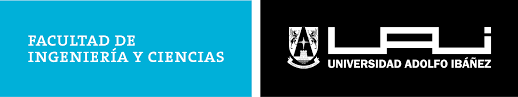


**Fundamentos de ciencias de datos,   Sección 3,   2022-2.**


**Profesora:   Carolina Lagos Campos.**


**Ayudante:   Bruno Reyes Sánchez.**

## **Tópicos**

* Diagrama de flujo


* Análisis exploratorio de datos 

* Barplot

* Histograma



### ¿Cómo estructurar un programa en Python?

Lenguaje de programación de alto nivel debido a su gran utilidad en distintas areas de la informatica, como el desarrollo web o el analisis de datos. Se caracteriza en su legibilidad de código. La codificación se ejecuta directamente, es decir, es un lenguaje interpretado.

Puede adoptar multiples paradigmas, como el imperativo, procedural, orientado a objetos y funcional. Para efectos de este curso, programaremos en imperativo.

En estos paradigmas, por lo general para poder estructurar un codigo coherente, se suele pensar primero en "cómo" se hará el mismo, es decir, primero pensaremos sobre que queremos que tenga y haga nuestro codigo. Por ejemplo, en la vida real, si nos detenemos a pensar en alguna acción, como es tomar agua de una botella, ¿que es lo primero que hacemos? Claro, lo primero que se nos ocurriría sería en tomar la botella con la mano, luego abrir su tapa y beber de ella, después cerramos la botella con la tapa y la dejamos en donde estaba.
Si analizamos esto a más detalle, estamos viendo una secuencia a seguir, un paso a paso:

* 1.- Tomar la botella con la mano
* 2.- Abrir la botella
* 3.- Beber agua
* 4.- Cerrar botella
* 5.- Devolver la botella a donde estaba

Esto mismo ocurre al momento de programar, primero que todo, antes de llegar y codificar, nos tenemos que detener a ver que queremos realmente de nuestro codigo, ¿queremos ver un gráfico? ¿ que tipo de grafico quiero ver? ¿mis variables de adecuarán bien a este? o también, ¿como puedo yo ver cuanta cantidad de personas hay por region? Estas preguntas están muy cercanas al curso, para hacer más visible esto, veamos dos ejemplos:

In [2]:
#Ejemplo 1

n = 1

if(n % 2 == 0):
  print("Es un número par")
else:
  print("No es par")

No es par


Acá estamos viendo una simple condicional en Python, donde el "flujo" del programa se desvía al considerar el modulo de los números, es decir, si el numero que ingresa a la condicional es divisible por dos se considerará par y el programa arrogará el mensaje "Es un número par", en caso de que no lo sea, el flujo se desvía fuera de la condicional if, ingresando al else arrogando el mensaje "No es par".

In [3]:
#Ejemplo 2

print("Eliga que operacion quiere hacer")
print("1.Sumar/ 2.Restar/ 3.Multiplicar/ 4.Dividir")
opcion=int(input("ingrese su opcion: "))
a=int(input("Numero 1: "))
b=int(input("Numero 2: "))

if(opcion == 1 ):
  print(a + b)
elif(opcion == 2 ):
  print(a - b)
elif(opcion == 3 ):
  print(a * b)
elif(opcion == 4 ):
  if(b==0):
    print("Operación inválida")
  else:
    dividir = a/b
    print(dividir)
else:
  print("Opción inválida")

Eliga que operacion quiere hacer
1.Sumar/ 2.Restar/ 3.Multiplicar/ 4.Dividir
Operación inválida


En este segundo ejemplo estamos viendo una simple calculadora de operaciones básicas, la cual, al ingresar la opción que nosotros queramos, nuestro "flujo" se desviará tomando una operación en particular.

Retomemos...

### Analisis exploratorio de datos

Exploratory Data Analysis (EDA) Analiza los datos para resumir sus características principales, usualmente a través de métodos visuales, para obtener una idea inicial de lo que nos dicen los datos.

Técnicas de EDA 

* **Resumen de datos** con métricas de tendencia central, métricas de dispersión o variabilidad, y otras.
* **Gráficos** observando características de cada variables y relaciones entre variables.
* **Detección de outliers** a través de técnicas de visualización y cuantitativas.
* **Técnicas cuantitativas** para determinar el comportamiento de cada variable, o el comportamiento entre ellas. Por ejemplo intervalos de confianza, test de hipótesis sobre la media y varianza, test de distribuciones, one-way ANOVA, coeficiente de correlación de Pearson, Kruskal-Wallis.

In [5]:
import pandas as pd
import numpy as np

In [7]:
#Importamos statsmodels.api para importar algunos set de datos
import statsmodels.api as sm

mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


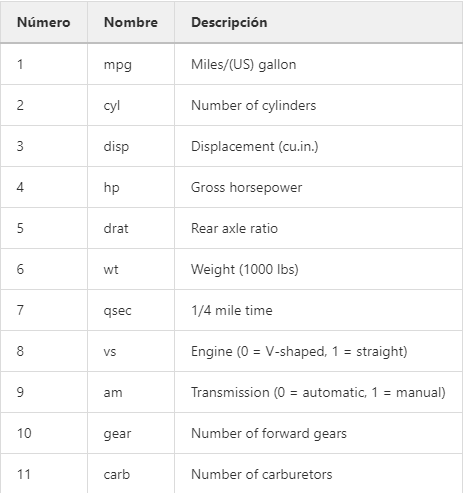

**Datos atipicos (outliers) respecto a una columna (númerica).**

Probemos la columna "drat".

In [8]:
iqr = mtcars["drat"].quantile(q=0.75) - mtcars["drat"].quantile(q=0.25)

max = mtcars["drat"].quantile(q=0.75) + 1.5 * iqr
min = mtcars["drat"].quantile(q=0.25) - 1.5 * iqr

atipicos = mtcars[(mtcars["drat"] > max) | (mtcars["drat"] < min)]
atipicos

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb


Ahora probemos con "qsec".

In [9]:
iqr = mtcars["qsec"].quantile(q=0.75) - mtcars["qsec"].quantile(q=0.25)

max = mtcars["qsec"].quantile(q=0.75) + 1.5 * iqr
min = mtcars["qsec"].quantile(q=0.25) - 1.5 * iqr

atipicos = mtcars[(mtcars["qsec"] > max) | (mtcars["qsec"] < min)]
atipicos

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Merc 230,22.8,4,140.8,95,3.92,3.15,22.9,1,0,4,2


Otra forma de ver esto de forma visual es ver su Boxplot asociado.

In [18]:
## Importante importar nuestra libreria a utilizar

from plotnine import *

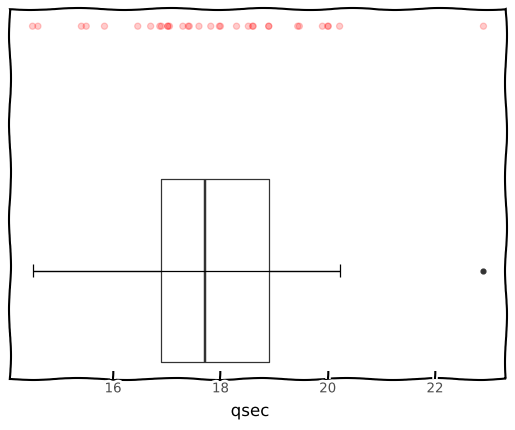

<ggplot: (8780917295830)>

In [25]:
(ggplot(mtcars)+
 aes(y="qsec")+
 geom_boxplot(aes(x=0))+
 stat_boxplot(aes(x=0),geom="errorbar",width=0.05)+
 geom_point(aes(x=1),color="red",alpha=0.2,size=2)+
 scale_x_continuous(breaks=None)+
 xlab("")+
 theme_xkcd()+
 coord_flip()
)



# Visualización de datos

## Plotnine

* Plotnine es una implementación de una gramática de gráficos en Python que se basa en ggplot2 (de R).

## ggplot

* Un paquete creado por Hadley Wickham para la visualización de datos en R
* Este paquete utiliza una gramática de gráficos, que fue desarrollada por Leland Wilkinson.
* ggplot nos entrega un conjunto de componentes que al ser combinadas producen gráficos personalizados.


### Barplot

Generalmente se usa para datos categóricos, así es más simple ver las distribuciones de estos mismos. Como la cantidad de hombres vs mujeres, muertos vs sobrevivientes, etc.

In [20]:
tabla=mtcars["am"].groupby(mtcars["am"]).count()
tabla=pd.DataFrame({"am":tabla.index,"conteo":np.array(tabla)})  #Con replace podemos cambiar el 0 a automatico y 1 a manual
tabla

,am,conteo
0,0,19
1,1,13


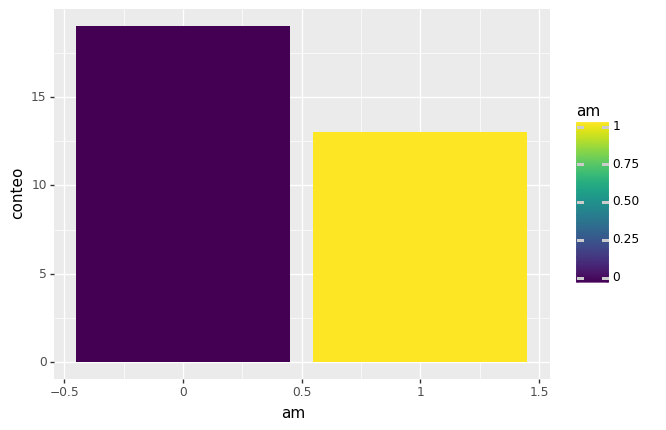

<ggplot: (8780917352858)>

In [24]:
(ggplot(tabla)+
 aes(x="am",y="conteo",fill="am")+
 geom_bar(stat="identity") 
)

### Histograma

/usr/local/lib/python3.8/dist-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 6'. Pick better value with 'binwidth'.


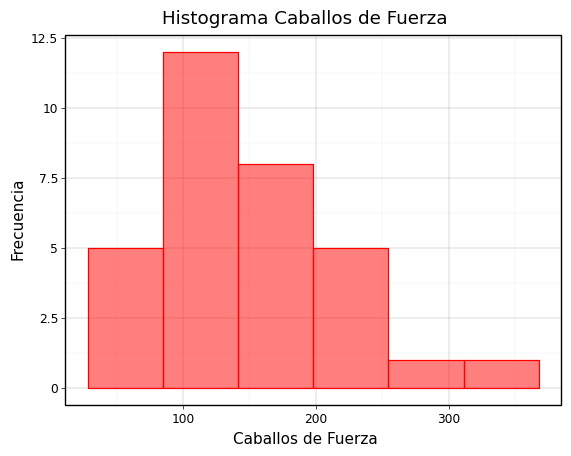

<ggplot: (8780930279858)>

In [23]:
(ggplot(mtcars)+
 aes(x="hp")+
 geom_histogram(color="red",fill="red",alpha=0.5)+ 
 theme_linedraw()+
 ggtitle("Histograma Caballos de Fuerza")+
 xlab("Caballos de Fuerza")+
 ylab("Frecuencia")
)

### Scatterplot

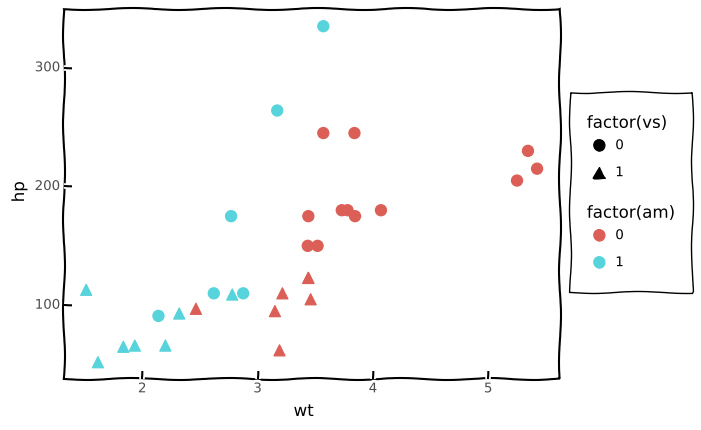

<ggplot: (8780910403572)>

In [26]:
(ggplot(mtcars)
+aes(x="wt",y="hp",shape="factor(vs)",color="factor(am)")
+geom_point(size=4)+
theme_xkcd()
) 

# Ejercicios

## Pregunta 1 

* Con el dataset de Estonia grafique solamente el sexo de sobrevivientes tras el accidente.

In [131]:
df_estonia = pd.read_csv("https://raw.githubusercontent.com/lmudu2/EstoniaDisaster/master/estonia-passenger-list.csv")

df_estonia = df_estonia[df_estonia["Survived"] == 1]   #Filtramos todos los tripulantes sobrevivientes


df_group = df_estonia.groupby(df_estonia['Sex'])['Survived'].sum() #Agrupamos segun sel sexo
df_group = pd.DataFrame(df_group)
df_group = df_group.reset_index()
df_group



,Sex,Survived
0,F,27
1,M,110


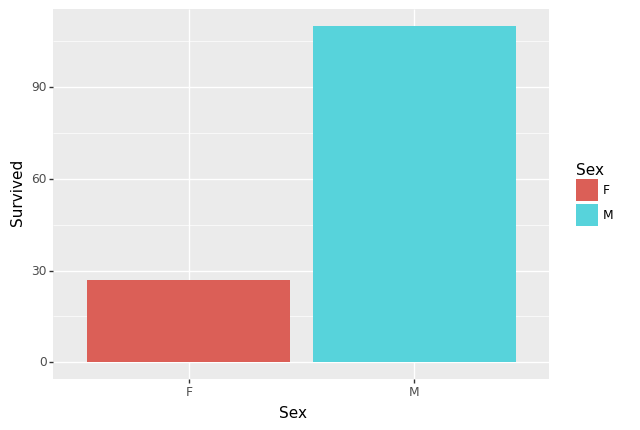

<ggplot: (8780910398946)>

In [132]:
(ggplot(df_group)+ 
 aes(x="Sex",y="Survived",fill="Sex")+
 geom_bar(stat="identity") 
)

## Pregunta 2

* Analice la distribución de las edades de la tripulacion de estonia.

/usr/local/lib/python3.8/dist-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 15'. Pick better value with 'binwidth'.


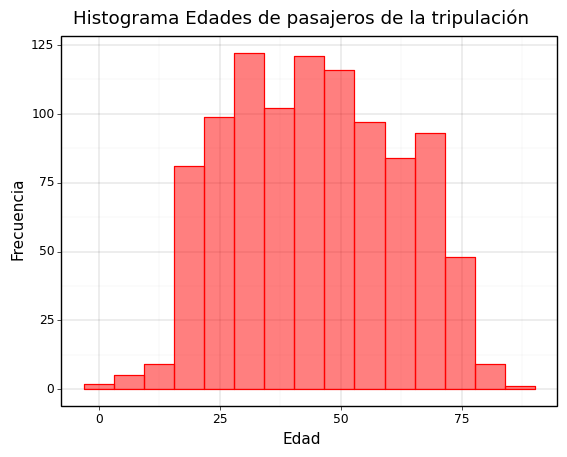

<ggplot: (8780930230239)>

In [31]:
df_estonia = pd.read_csv("https://raw.githubusercontent.com/lmudu2/EstoniaDisaster/master/estonia-passenger-list.csv")

(ggplot(df_estonia)+
 aes(x="Age")+
 geom_histogram(color="red",fill="red",alpha=0.5)+ 
 theme_linedraw()+
 ggtitle("Histograma Edades de pasajeros de la tripulación")+
 xlab("Edad")+
 ylab("Frecuencia")
)

* Las edades de los tripulantes del Estonia se concentran en en centro, es decir, la mayoria de los tripulantes eran adultos "jóvenes", mayores a 25 y menores a 75 años.

## Pregunta 3

* Agrupe por paises la cantidad de sobrevivientes y grafiquelo.

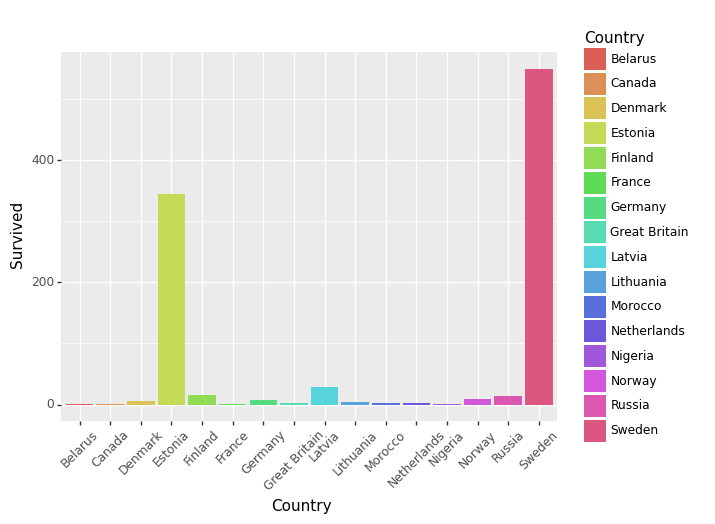

<ggplot: (8780930203763)>

In [78]:
df_surv = df_estonia.groupby(df_estonia['Country'])['Survived'].count()
df_surv = pd.DataFrame(df_surv)
df_surv = df_surv.reset_index()

(ggplot(df_surv)+ 
 aes(x="Country",y="Survived",fill="Country")+
 geom_bar(stat="identity")+
 theme(axis_text_x = element_text(angle = 45))
)

## Pregunta 4

* Analice si existen outliers en el set de datos de Pokemon. (analice cada columna numerica).

In [80]:
df_pokemon = pd.read_csv("data/Pokemon.csv")
df_pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


* Columna "Total"

In [81]:
iqr = df_pokemon["Total"].quantile(q=0.75) - df_pokemon["Total"].quantile(q=0.25)

max = df_pokemon["Total"].quantile(q=0.75) + 1.5 * iqr
min = df_pokemon["Total"].quantile(q=0.25) - 1.5 * iqr

atipicos = df_pokemon[(df_pokemon["Total"] > max) | (df_pokemon["Total"] < min)]
atipicos

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


* Columna "HP"

In [82]:
iqr = df_pokemon["HP"].quantile(q=0.75) - df_pokemon["HP"].quantile(q=0.25)

max = df_pokemon["HP"].quantile(q=0.75) + 1.5 * iqr
min = df_pokemon["HP"].quantile(q=0.25) - 1.5 * iqr

atipicos = df_pokemon[(df_pokemon["HP"] > max) | (df_pokemon["HP"] < min)]
atipicos

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
45,40,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45,1,False
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
142,131,Lapras,Water,Ice,535,130,85,80,85,95,60,1,False
145,134,Vaporeon,Water,NaN,525,130,65,60,110,95,65,1,False
155,143,Snorlax,Normal,NaN,540,160,110,65,65,110,30,1,False
217,202,Wobbuffet,Psychic,NaN,405,190,33,58,33,58,33,2,False
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
313,289,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False
316,292,Shedinja,Bug,Ghost,236,1,90,45,30,30,40,3,False
321,297,Hariyama,Fighting,NaN,474,144,120,60,40,60,50,3,False


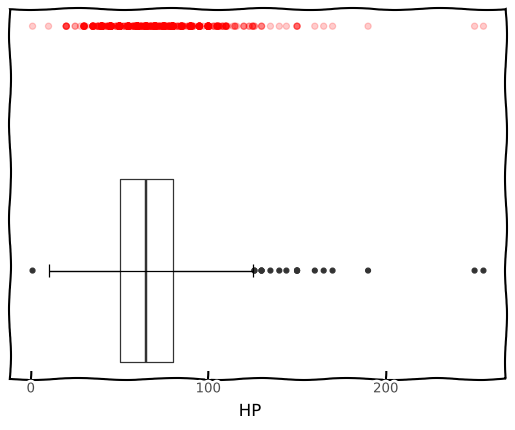

<ggplot: (8780917323517)>

In [89]:
(ggplot(df_pokemon)+
 aes(y="HP")+
 geom_boxplot(aes(x=0))+
 stat_boxplot(aes(x=0),geom="errorbar",width=0.05)+
 geom_point(aes(x=1),color="red",alpha=0.2,size=2)+
 scale_x_continuous(breaks=None)+
 xlab("")+
 theme_xkcd()+
 coord_flip()
)



* Columna "Attack"

In [83]:
iqr = df_pokemon["Attack"].quantile(q=0.75) - df_pokemon["Attack"].quantile(q=0.25)

max = df_pokemon["Attack"].quantile(q=0.75) + 1.5 * iqr
min = df_pokemon["Attack"].quantile(q=0.25) - 1.5 * iqr

atipicos = df_pokemon[(df_pokemon["Attack"] > max) | (df_pokemon["Attack"] < min)]
atipicos

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
232,214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
494,445,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False
711,646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True


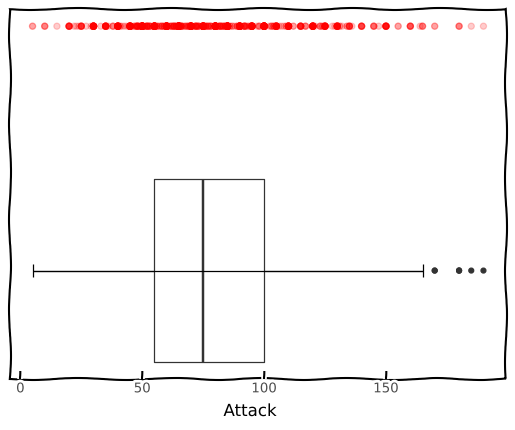

<ggplot: (8780881268465)>

In [90]:
(ggplot(df_pokemon)+
 aes(y="Attack")+
 geom_boxplot(aes(x=0))+
 stat_boxplot(aes(x=0),geom="errorbar",width=0.05)+
 geom_point(aes(x=1),color="red",alpha=0.2,size=2)+
 scale_x_continuous(breaks=None)+
 xlab("")+
 theme_xkcd()+
 coord_flip()
)



* Columna "Defense"

In [84]:
iqr = df_pokemon["Defense"].quantile(q=0.75) - df_pokemon["Defense"].quantile(q=0.25)

max = df_pokemon["Defense"].quantile(q=0.75) + 1.5 * iqr
min = df_pokemon["Defense"].quantile(q=0.25) - 1.5 * iqr

atipicos = df_pokemon[(df_pokemon["Defense"] > max) | (df_pokemon["Defense"] < min)]
atipicos

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
87,80,SlowbroMega Slowbro,Water,Psychic,590,95,75,180,130,80,30,1,False
98,91,Cloyster,Water,Ice,525,50,95,180,85,45,70,1,False
103,95,Onix,Rock,Ground,385,35,45,160,30,45,70,1,False
223,208,Steelix,Steel,Ground,510,75,85,200,55,65,30,2,False
224,208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
332,306,Aggron,Steel,Rock,530,70,110,180,60,60,50,3,False
333,306,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False
414,377,Regirock,Rock,NaN,580,80,100,200,50,100,50,3,True
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True


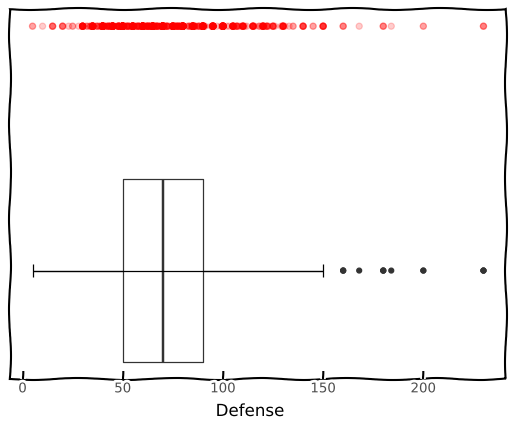

<ggplot: (8780930349138)>

In [91]:
(ggplot(df_pokemon)+
 aes(y="Defense")+
 geom_boxplot(aes(x=0))+
 stat_boxplot(aes(x=0),geom="errorbar",width=0.05)+
 geom_point(aes(x=1),color="red",alpha=0.2,size=2)+
 scale_x_continuous(breaks=None)+
 xlab("")+
 theme_xkcd()+
 coord_flip()
)



* Columna "Sp. Atk"

In [85]:
iqr = df_pokemon["Sp. Atk"].quantile(q=0.75) - df_pokemon["Sp. Atk"].quantile(q=0.25)

max = df_pokemon["Sp. Atk"].quantile(q=0.75) + 1.5 * iqr
min = df_pokemon["Sp. Atk"].quantile(q=0.25) - 1.5 * iqr

atipicos = df_pokemon[(df_pokemon["Sp. Atk"] > max) | (df_pokemon["Sp. Atk"] < min)]
atipicos

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
71,65,AlakazamMega Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False
102,94,GengarMega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
196,181,AmpharosMega Ampharos,Electric,Dragon,610,90,95,105,165,110,45,2,False
306,282,GardevoirMega Gardevoir,Psychic,Fairy,618,68,85,65,165,135,100,3,False
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
712,646,KyuremWhite Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


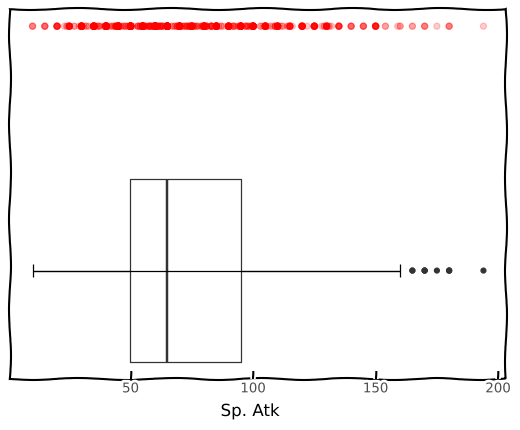

<ggplot: (8780917337619)>

In [92]:
(ggplot(df_pokemon)+
 aes(y="Sp. Atk")+
 geom_boxplot(aes(x=0))+
 stat_boxplot(aes(x=0),geom="errorbar",width=0.05)+
 geom_point(aes(x=1),color="red",alpha=0.2,size=2)+
 scale_x_continuous(breaks=None)+
 xlab("")+
 theme_xkcd()+
 coord_flip()
)



* Columna "Sp. Def"

In [86]:
iqr = df_pokemon["Sp. Def"].quantile(q=0.75) - df_pokemon["Sp. Def"].quantile(q=0.25)

max = df_pokemon["Sp. Def"].quantile(q=0.75) + 1.5 * iqr
min = df_pokemon["Sp. Def"].quantile(q=0.25) - 1.5 * iqr

atipicos = df_pokemon[(df_pokemon["Sp. Def"] > max) | (df_pokemon["Sp. Def"] < min)]
atipicos

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
269,249,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
415,378,Regice,Ice,NaN,580,80,50,100,100,200,50,3,True
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
430,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
739,671,Florges,Fairy,NaN,552,78,65,68,112,154,75,6,False


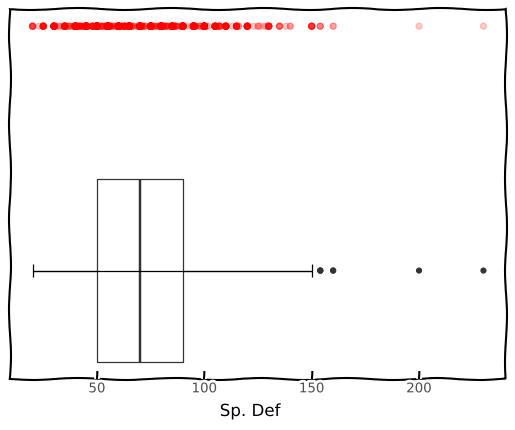

<ggplot: (8780910360694)>

In [93]:
(ggplot(df_pokemon)+
 aes(y="Sp. Def")+
 geom_boxplot(aes(x=0))+
 stat_boxplot(aes(x=0),geom="errorbar",width=0.05)+
 geom_point(aes(x=1),color="red",alpha=0.2,size=2)+
 scale_x_continuous(breaks=None)+
 xlab("")+
 theme_xkcd()+
 coord_flip()
)



* Columna "Speed"

In [87]:
	

iqr = df_pokemon["Speed"].quantile(q=0.75) - df_pokemon["Speed"].quantile(q=0.25)

max = df_pokemon["Speed"].quantile(q=0.75) + 1.5 * iqr
min = df_pokemon["Speed"].quantile(q=0.25) - 1.5 * iqr

atipicos = df_pokemon[(df_pokemon["Speed"] > max) | (df_pokemon["Speed"] < min)]
atipicos

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
315,291,Ninjask,Bug,Flying,456,61,90,45,50,50,160,3,False
431,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True


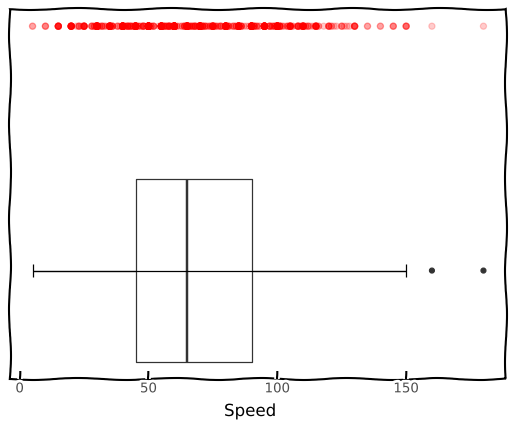

<ggplot: (8780917413548)>

In [94]:
(ggplot(df_pokemon)+
 aes(y="Speed")+
 geom_boxplot(aes(x=0))+
 stat_boxplot(aes(x=0),geom="errorbar",width=0.05)+
 geom_point(aes(x=1),color="red",alpha=0.2,size=2)+
 scale_x_continuous(breaks=None)+
 xlab("")+
 theme_xkcd()+
 coord_flip()
)



## Pregunta 5

* Analice el comportamiento de dos columnas numericas, ¿que puede decir al respecto? ¿existe alguna relación?

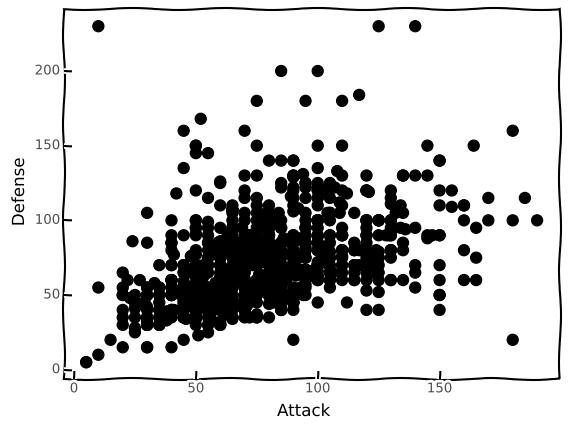

<ggplot: (8780858131453)>

In [103]:
(ggplot(df_pokemon)
+aes(x="Attack",y="Defense")
+geom_point(size=4)+
theme_xkcd()
) 

## Pregunta 6

* Haga un estudio completo de los datos de nba, pruebe los tipos de datos, haga limpieza si es necesario, comente como se comportan los datos, etc. (todo lo que se ha visto hasta el momento en el curso).

In [106]:
df_nba = pd.read_csv("data/nba.csv")
df_nba

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [107]:
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


In [108]:
print(df_nba.isnull().sum())

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64


In [109]:
#Como existen datos nulos, procederemosa eliminarlos

df_nba = df_nba.dropna()
df_nba


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160.0
...,...,...,...,...,...,...,...,...,...
449,Rodney Hood,Utah Jazz,5.0,SG,23.0,6-8,206.0,Duke,1348440.0
451,Chris Johnson,Utah Jazz,23.0,SF,26.0,6-6,206.0,Dayton,981348.0
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0


In [110]:
print(df_nba.loc[df_nba.duplicated()].count()) 

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64


In [114]:
df_nba

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160.0
...,...,...,...,...,...,...,...,...,...
449,Rodney Hood,Utah Jazz,5.0,SG,23.0,6-8,206.0,Duke,1348440.0
451,Chris Johnson,Utah Jazz,23.0,SF,26.0,6-6,206.0,Dayton,981348.0
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0


* Las variables numericas en este caso es la edad y la altura, veamos como se comportan

In [117]:
df_num = df_nba[["Age","Weight"]]
df_num.head()

,Age,Weight
0,25.0,180.0
1,25.0,235.0
3,22.0,185.0
6,21.0,235.0
7,25.0,238.0


/usr/local/lib/python3.8/dist-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 15'. Pick better value with 'binwidth'.


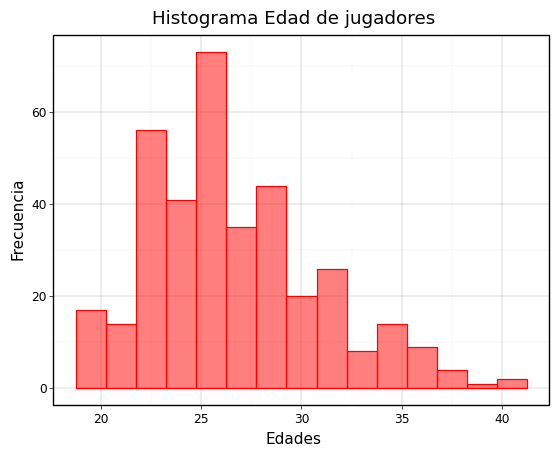

<ggplot: (8780917291120)>

In [120]:
(ggplot(df_num)+
 aes(x="Age")+
 geom_histogram(color="red",fill="red",alpha=0.5)+ 
 theme_linedraw()+
 ggtitle("Histograma Edad de jugadores")+
 xlab("Edades")+
 ylab("Frecuencia")
)

/usr/local/lib/python3.8/dist-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 11'. Pick better value with 'binwidth'.


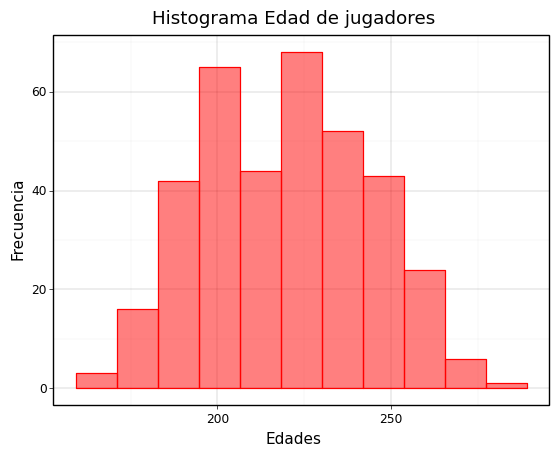

<ggplot: (8780857209558)>

In [121]:
(ggplot(df_num)+
 aes(x="Weight")+
 geom_histogram(color="red",fill="red",alpha=0.5)+ 
 theme_linedraw()+
 ggtitle("Histograma Edad de jugadores")+
 xlab("Edades")+
 ylab("Frecuencia")
)

* La distribución de los datos se ve claramente, donde en la edad notamos edades jóvenes y en la altura vemos que superan los 2 m. 